# Modeling of Physical Systems

**Created by**: Marcin Zub

**Date**: 25.03.2025

**Title**: *Convergence Analysis of Upwind Scheme*

## Package installation
First, we need to install some additional packages wchich are not a part of Google Colab.

We will use `pip` for that. Packages we need:

- `open-atmos-jupyter-utils` - helps to print vector images from matplotlib  

In [1]:
!pip install open-atmos-jupyter-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


Next, we will import the packages that are pre-installed on Google Colab, and those which were installed by us in previous step:

- `math` - handles math operations like `math.sqrt` & `math.exp`
- `numpy` - array manipulation tool
- `scipy` - provides constants like `pi`
- `matplotlib` - handles data visualization

In [2]:
import math
import numpy as np
import open_atmos_jupyter_utils

from scipy import constants
from matplotlib import pyplot

## Code written during the class

Next steps are just for copying what we've done during the class, so I will not be going over the whole explanation.

In [4]:
class Psi_0:
  """
  """
  def __init__(self):
    self.x0 = 5
    self.a = 1
    self.sigma = 25

  def __call__(self, x):
    return self.a * np.exp(-(x-self.x0) ** 2 / (2 * self.sigma ** 2))

In [5]:
psi_0 = Psi_0()
nx = 100
x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
u = 2
t_max = 50

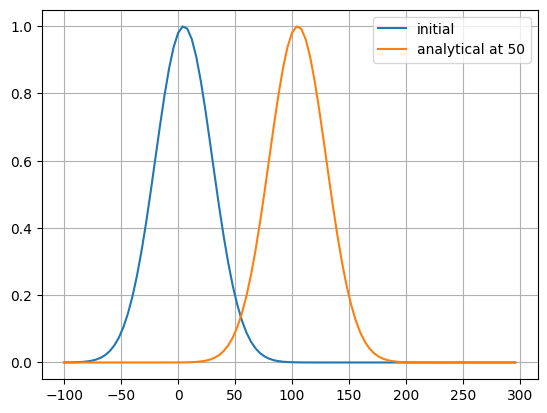

In [6]:
pyplot.plot(x, psi_0(x), label="initial")
pyplot.plot(x, psi_0(x - u * t_max), label=f"analytical at {t_max}")
pyplot.legend()
pyplot.grid()

In [7]:
class One:
  def __radd__(self, o):
    return slice(o.start+1, o.stop+1)

  def __rsub__(self, o):
    return slice(o.start-1, o.stop-1)

In [8]:
def F(l, r, C):
  return ((C + abs(C)) / 2) * l + ((C - abs(C)) / 2) * r

In [9]:
one = One()
nt = 50
dt = t_max/nt
C = u*dt/dx
i = slice(1, nx-2)
psi = psi_0(x)

for _ in range(nt):
  psi[i] = psi[i] - (F(psi[i], psi[i+one], C)-F(psi[i-one], psi[i], C))

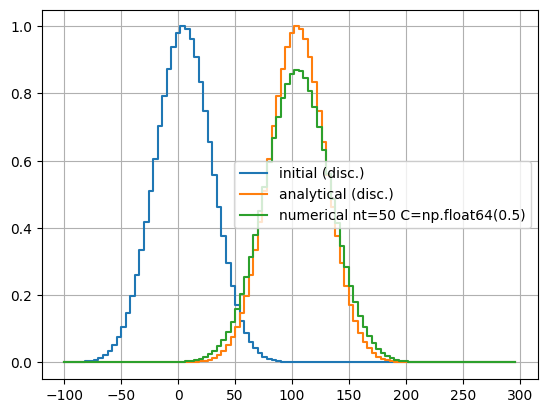

In [10]:
pyplot.step(x, psi_0(x), label="initial (disc.)", where="mid")
pyplot.step(x, psi_0(x-u*t_max), label="analytical (disc.)", where="mid")
pyplot.step(x, psi, label=f"numerical {nt=} {C=}", where="mid")
pyplot.legend()
pyplot.grid()

## Calculating RMSE
**RMSE** (Root mean squared error) will help us ilustrate how changes of *dt* or *dx* affect the measure of error.

To achieve that, let's use the basic approach and calculate the rmse for some set of *dt* and see the results on a plot.

Requirements:
- keep *Courant number* constant

We need to

In [53]:
def RMSE(nt, nx) -> tuple[float, float]:
  """
  Calculates Root Mean Squared Error.

  Keyword arguments:
  nt [float] -- temporal step
  nx [float] -- spatial convergence

  Returns tuple[float, float] rmse, C
  """

  x, dx = np.linspace(0, 400, nx, endpoint=False, retstep=True)
  one = One()
  i = slice(1, nx-2)
  psi = psi_0(x)
  dt = t_max/nt
  C = u*dt/dx

  for _ in range(nt):
    psi[i] = psi[i] - (F(psi[i], psi[i+one], C)-F(psi[i-one], psi[i], C))

  a_psi = psi_0(x - u*t_max)
  return (np.sqrt(np.mean((psi - a_psi)**2)), C)

Finaly, let's create some arrays for storing the results of rmse, courant number values and nt for plotting.

After that, we will calculate rmse 49 times and add values to the corresponding list.

Last step is to plot the results.

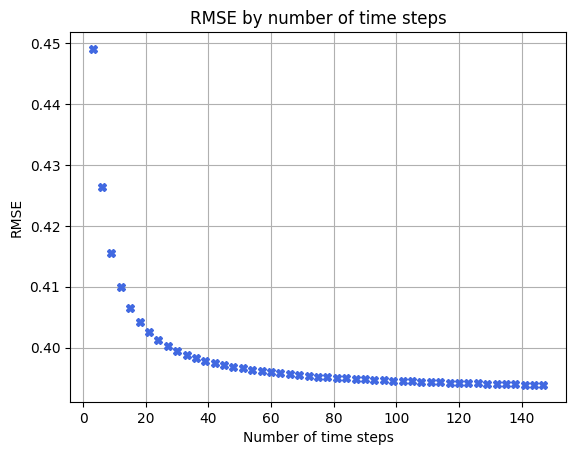

In [57]:
a_psi = psi_0(x - u*t_max)
nx_nt_const = 3
nt_old = 3

err_results = []
cour_results = []
nt_values = []

for i in range(1, 50):
  nt = i * nt_old
  rmse, courant = RMSE(nt, nx_nt_const*nt)

  nt_values.append(nt)
  err_results.append(rmse)
  cour_results.append(courant)


pyplot.plot(nt_values, err_results, 'X', label="RMSE points", color='royalblue')
pyplot.xlabel("Number of time steps")
pyplot.ylabel("RMSE")
pyplot.title("RMSE by number of time steps")
pyplot.grid()

To make sure that `C` was constant:

In [50]:
set(cour_results)

{np.float64(0.5)}

## Results

As it appears on the plot, the RMSE values are decreasing in a logarithmic way along with the number of time steps. The courant number stays constant.

In [48]:
print('Done')

Done
